<a href="https://colab.research.google.com/github/ranparas/fastai_notebooks/blob/master/dogwolforcoyote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision import *

In [ ]:
classes = ['wolves','coyotes','dogs']

In [ ]:
folders = ['wolves', 'coyotes', 'dogs']

In [ ]:
path = Path('data/canines')
for folder in folders:
    file = str(folder) + '.csv'
    print(file)
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

wolves.csv
coyotes.csv
dogs.csv


In [ ]:
for folder in folders:
  file = str(folder) + '.csv'
  dest = path/folder
  download_images(path/file, dest, max_pics=300)

In [ ]:
verify_images??

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

wolves


coyotes


dogs


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['coyotes', 'dogs', 'wolves']

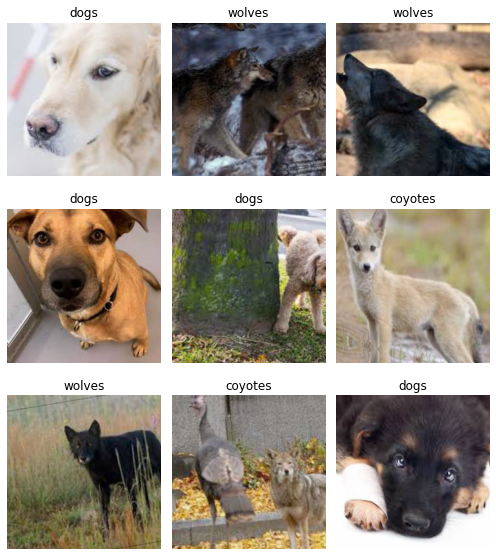

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['coyotes', 'dogs', 'wolves'], 3, 720, 180)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.092865,0.301683,0.094444,04:20
1,0.710434,0.456092,0.088889,04:21
2,0.520249,0.473287,0.088889,04:21
3,0.419593,0.469485,0.088889,04:21


In [ ]:
learn.save('stage-1')

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


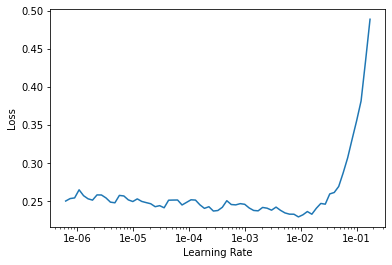

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.269692,0.786583,0.166667,06:11
1,0.327747,1.718549,0.200000,06:11
2,0.313789,0.600209,0.138889,06:08
3,0.273176,0.509611,0.127778,06:11


In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


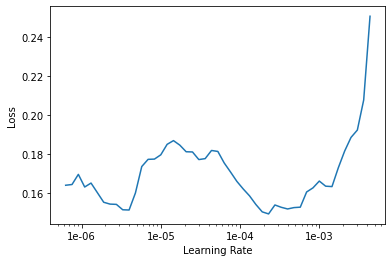

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-4, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.096035,0.338423,0.072222,06:19
1,0.069106,0.305597,0.072222,06:16


In [ ]:
learn.save('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

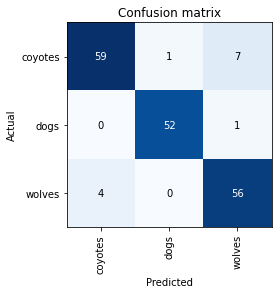

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
from fastai.widgets import *

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

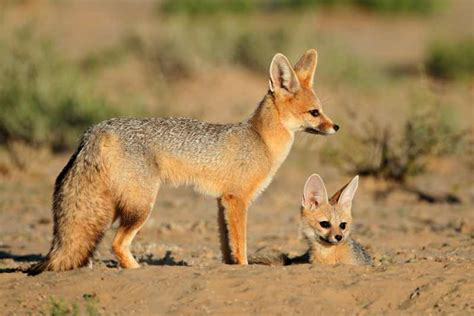

In [ ]:
img = open_image(path/'capefox.jpg')
img

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
learn.data.classes[to_data(pred_class)]

'coyotes'